c Termin 3 - Machine Learning Algorithmen (Lösung)

# Maschinelles Lernen  
### Übung Termin 2 - 
### Einfache Machine Learning Algorithmen

# Kurzer Theorie-Überblick


# 1 Überwachtes Lernen
Überwachtes Lernen bezieht sich auf eine Klasse von Algorithmen des maschinellen Lernens, bei der ein Modell mit der Verwendung von gelabelten Trainingsdaten trainiert wird, um eine Vorhersage zu treffen. Gelabelte Trainingsdaten sind Datensätze, die sowohl die Eingabewerte (unabhängige Variablen) als auch die zugehörigen Zielwerte (abhängige Variablen) enthalten.
### 1.1 Binäre Klassifikation
Eine binäre Klassifikation ist eine Form der Klassifikation in der maschinellen Lernens, bei der eine Entscheidung zwischen nur zwei Kategorien getroffen wird. Die Aufgabe besteht darin, einen Algorithmus zu trainieren, der die richtige Klasse für einen neuen Datensatz vorhersagen kann, basierend auf den vorhandenen Merkmalen oder Eigenschaften des Datensatzes. Ein Beispiel wäre die Vorhersage, ob ein Patient an einer bestimmten Krankheit leidet oder nicht.

### 1.2 Multiklassen Klassifikation
Multiklassenklassifikation ist eine Form der Klassifikation im maschinellen Lernen, bei der eine Entscheidung zwischen mehr als zwei Kategorien getroffen wird. Das Ziel bei der Multiklassenklassifikation besteht darin, einen Algorithmus zu trainieren, der die richtige Klasse für einen neuen Datensatz vorhersagen kann. Dabei werden die vorhandenen Merkmale oder Eigenschaften des Datensatzes verwendet, um die Zuordnung zu einer der möglichen Klassen zu bestimmen. Ein Beispiel für die Multiklassenklassifikation wäre die Klassifizierung von Bildern in verschiedene Kategorien wie Hunde, Katzen oder Vögel. Der Algorithmus müsste trainiert werden, um die visuellen Merkmale der Bilder zu analysieren und die richtige Klasse für jedes Bild vorherzusagen.

### 1.3 Regression
Regression ist ein maschinelles Lernverfahren, bei dem eine Beziehung zwischen abhängigen und unabhängigen Variablen modelliert wird. Die Vorhersage der abhängigen Variablen erfolgt auf Basis der Werte der unabhängigen Variablen. Ein Beispiel für Regression die Vorhersage des Grundwasserstands anhand von Daten wie der Niederschlagsmenge, der Bodenart und der Landnutzung.


### Verwendete Algorithmen

- **Support Vector Machines (SVM)**: Diese Methode versucht, eine Entscheidungsgrenze zwischen den verschiedenen Klassen zu finden, indem sie eine Hyperebene im Feature-Space konstruiert. SVMs sind bekannt für ihre hohe Genauigkeit und ihre Fähigkeit, mit großen Datensätzen umzugehen.

- **Random Forests (RF)**: Diese Methode nutzt eine Kombination von Entscheidungsbäumen, um Vorhersagen zu treffen. RandomForests sind besonders gut geeignet, wenn der Datensatz viele Features enthält, da sie in der Lage sind, relevante Features automatisch zu identifizieren.


# 2 Unüberwachtes Lernen
Im Gegensatz zum überwachten Lernen gibt es beim unüberwachten Lernen keine Zielvariablen oder gelabelten Trainingsdaten. Stattdessen zielt das unüberwachte Lernen darauf ab, unbekannte Strukturen in den Daten zu finden und zu extrahieren.


### Verwendete Algorithmen
- **K-Means Clustering**: Diese Methode gruppiert die Datenpunkte in k Klassen, indem sie versucht, die Datenpunkte innerhalb jeder Klasse möglichst ähnlich zu gestalten. K-Means Clustering kann verwendet werden, um Trends in den Daten zu identifizieren und Vorhersagen zu treffen.

- **Principal Component Analysis (PCA)**: Diese Methode reduziert die Dimensionalität des Feature-Space, indem sie die Variablen in eine kleinere Anzahl von Komponenten projiziert. PCA kann dazu beitragen, die Auswirkungen von Rauschen und Redundanz im Datensatz zu reduzieren.

- **Kombination PCA + K-Means Clustering**: Durch die Kombination von PCA und K-Means Clustering können beide Methoden in einem Algorithmus verwendet werden, um eine bessere Vorhersagegenauigkeit zu erzielen.


### Laden der Bibliotheken

In [1]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Methods
from sklearn.svm import SVC # support vector classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR # support vector regression
from sklearn.ensemble import RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Adv
from sklearn.pipeline import Pipeline

# 1 Überwachtes Lernen

## 1.1 Binäre Klassifikation

### 1.1.2 Datensatz einlesen und Aufbereiten

Grundwasserstichtagsmesssung aus dem Jahr 2005
Aufgabe: Binärer Klassifikation der Landnutzung auf Basis alle Parameter

In [2]:
# Einladen der Daten
filename = 'gwdata_2005.csv'
dataset = pd.read_csv(filename, delimiter=';', encoding="ISO-8859-1")

# Preprocessing
dataset_cleaned = dataset.dropna(axis=0, how='any')
data = dataset_cleaned.drop(['GWNum','Messstelle','Rechtswert', 'Hochwert', 'Aquifer','Aquifer2','landuse'], axis=1)
data.head()

,Ca,Cl,DOC,LF_mS_m,K,Mg,Na,NO3,pH,SO4,SiO2,U,PSM,Aquifer_kz,landuse_num
0,132.0,5.8,1.10,56.6,0.5,8.8,3.8,12.4,6.92,15.6,8.9,0.00025,0.0,31,0
1,15.2,2.4,0.25,11.1,1.4,4.3,1.4,4.5,6.78,2.0,10.7,0.00025,0.0,81,0
2,5.2,1.1,0.30,4.7,0.6,1.0,3.4,4.0,6.69,4.0,16.0,0.00025,0.0,91,0
3,7.4,1.8,0.20,9.4,0.7,1.2,3.1,6.4,6.96,3.4,18.6,0.00025,0.0,91,0
4,85.0,55.8,0.85,58.5,7.7,4.2,23.6,18.2,7.25,23.1,12.3,0.00025,0.0,4,0


In [3]:
# 0= no_agr, 1 = agr
dataset_cleaned.landuse_num
#print("Anzahl jedes eindeutigen Werts:\n", dataset['landuse'].value_counts())

0       0
1       0
2       0
3       0
4       0
       ..
1929    0
1930    1
1931    0
1933    1
1934    0
Name: landuse_num, Length: 1879, dtype: int64

#### Aufteilen der Daten in einen Test- und Trainingsdatensaz

In [4]:
# Set seed for reproducibility
random_state = 42

# Aufteilen der Daten in Trainings- und Testdaten
X = data.drop('landuse_num', axis=1) # Input variables
Y = data['landuse_num']   # Target variable
test_size = 0.2  # Anteil Testdaten 20%

# Shuffle und Split der Daten in Trainings- und Testdaten
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state, shuffle=True)


### 1.1.2 Support Vector Machines
- Support Vector Classification (SVC)

In [5]:
#Zufalls-Seed für die Reproduzierbarkeit 
seed = 42
#Metrik für die Kreuzvalidierung
scoring = 'accuracy'
#Anzahl der Folds für die Kreuzvalidierung
num_folds = 10

#### SVC mit unskalierten Daten

In [6]:
# Erstellen des SVM-Modells
svm = SVC(kernel='rbf', gamma='auto')

# Definieren der K-Fold CV
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# Kreuzvalidierung der SVM-Modells
cv_svm = cross_val_score(svm, X_train, Y_train, cv=kfold, scoring=scoring)

# Berechnung der mittleren Genauigkeit und der Standardabweichung
msg = f"SVM Accuracy: {cv_svm.mean():.3f} ({cv_svm.std():.3f})"

# Ausgabe der SVM-Genauigkeit
print(msg)


SVM Accuracy: 0.621 (0.036)


#### SVC mit skalierte Daten

In [7]:
# Erstellen des StandardScaler-Objekts
scaler = StandardScaler()

# Skalierung der Trainingsdaten und Erstellung des SVM-Modells
X_train_scaled = scaler.fit_transform(X_train) # Skalierung der Trainingsdaten
svm_scaled = SVC(kernel='rbf', gamma='auto') # Erstellen des SVM-Modells mit RBF-Kernel und 'auto' gamma

# Definieren der K-Folds CV 
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# Kreuzvalidierung der SVM-Modells
cv_svm_scaled = cross_val_score(svm_scaled, X_train_scaled, Y_train, cv=kfold, scoring=scoring)

# Berechnung der mittleren Genauigkeit und der Standardabweichung
msg = "%f (%f)" % (cv_svm_scaled.mean(), cv_svm_scaled.std())

# Ausgabe der SVM-Genauigkeit
print('SVM(scaled) Accuracy: ', msg)


SVM(scaled) Accuracy:  0.681960 (0.022532)


#### <font color='blue'>For Your Interest</font>
Der nächste Codeabschnitt erstellt eine Pipeline mit dem StandardScaler und dem SVM-Modell. Die Pipeline ermöglicht eine nahtlose Integration der Skalierung und des Modells in einen einzigen Prozess.



In [8]:
# Erstellen der Pipeline für das SVM-Modell mit StandardScaler
svm_sc = Pipeline([
    ('scaler', StandardScaler()), # Skalierung der Daten
    ('svm', SVC(kernel='rbf', gamma='auto'))   # Erstellen des SVM-Modells mit linearem Kernel
])

# Definieren der K-Folds CV 
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# Kreuzvalidierung des SVM-Modells
cv_svm_sc = cross_val_score(svm_sc, X_train, Y_train, cv=kfold, scoring=scoring)

# Berechnung der mittleren Genauigkeit und der Standardabweichung
msg = "%f (%f)" % (cv_svm_sc.mean(), cv_svm_sc.std())

# Ausgabe der SVM-Genauigkeit
print('SVM(scaled) Accuracy: ', msg)

SVM(scaled) Accuracy:  0.682631 (0.023280)


### 1.1.3 Random Forest
- Random Forest Classifier

In [9]:
# Erstellen des RF-Modells
rf = RandomForestClassifier()

# Definieren der K-Folds CV 
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

# Kreuzvalidierung des RF-Modells
cv_rf = cross_val_score(rf, X_train_scaled, Y_train, cv=kfold, scoring=scoring)

# Berechnung der mittleren Genauigkeit und der Standardabweichung
msg = "%f (%f)" % (cv_rf.mean(), cv_rf.std())

# Ausgabe der RF-Genauigkeit
print('RF Accuracy: ', msg)


RF Accuracy:  0.749863 (0.018694)


### 1.1.4 Vergleich der Ergebnisse

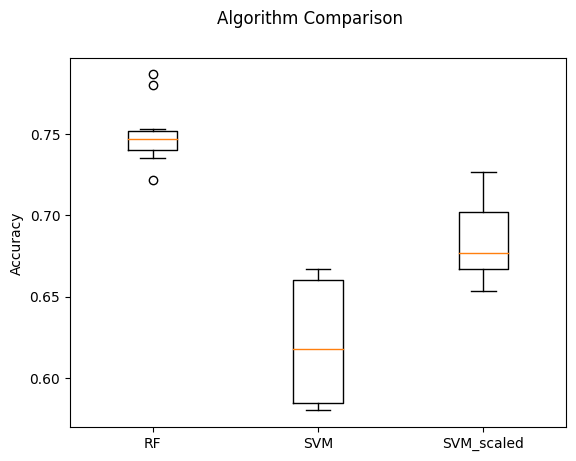

In [10]:
results = []
results.append(cv_rf)
results.append(cv_svm)
results.append(cv_svm_sc)

# Plotten
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(['RF', 'SVM', 'SVM_scaled'])
ax.set_ylabel('Accuracy')
plt.show()

### 1.1.5 Auswertung des besten Modells

In [11]:
# Klassifikator initialisieren
rfc = RandomForestClassifier()

# Klassifikator auf Trainingsdaten trainieren
rfc.fit(X_train, Y_train)

# Vorhersagen auf Testdaten treffen
y_pred = rfc.predict(X_test)

# Genauigkeit berechnen und ausgeben
print("Accuracy: {:.2f}".format(accuracy_score(Y_test, y_pred)))

# Confusionmatrix und Klassifikationsreport berechnen und ausgeben
Confusionmatrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", Confusionmatrix)
klassifikationsbericht = classification_report(Y_test, y_pred)
print("Classifikation Report:\n", klassifikationsbericht)


Accuracy: 0.76
Confusion Matrix:
 [[200  24]
 [ 65  87]]
Classifikation Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.82       224
           1       0.78      0.57      0.66       152

    accuracy                           0.76       376
   macro avg       0.77      0.73      0.74       376
weighted avg       0.77      0.76      0.75       376



## 1.2. Multiklassen Klassifikation

### 1.2.1 Datensatz laden

Dieser Datensatz enthält 150 Beispiele von Blumen, die jeweils einer von 
- drei Arten angehören (Setosa, Versicolor oder Virginica). 
Der Datensatz enthält - 
- vier numerische Merkmale (Länge und Breite von Sepal und Petal) und ist gut geeignet, um verschiedene Machine-Learning-Modelle auf ihre Fähigkeit zur Vorhersage der Blumenarten zu testen.

Die Daten werden Bunch-Objekt geladen, das neben den Eingangsmerkmalen und den Zielwerten auch Metadaten wie die Namen der Merkmale und die Namen der Klassen enthält
Ein "bunch" Objekt enthält normalerweise die folgenden Attribute:

- data: Ein Numpy-Array mit den Merkmalswerten.
- target: Ein Numpy-Array mit den Zielwerten.
- feature_names: Eine Liste der Namen der Merkmale.
- target_names: Eine Liste der Namen der Zielklassen.
- DESCR: Eine Beschreibung des Datensatzes.

<img src="Iris-Dataset-Classification.png" alt="Iris Datset" width="800"/>






In [12]:
from sklearn.datasets import load_iris
iris = load_iris()

# Lese die Features aus dem iris-Datensatz aus und speichere sie in der Variable "X"
X = iris['data']

# Lese das Target aus dem iris-Datensatz aus und speichere es in der Variable "Y"
Y = iris['target']

## <font color='red'>Aufgabe:</font> 
Führe analog zur binären Klassifikation eine multiklassen Klassifikation mit Hilfe des Iris Datensatzes durch. Implementiere mindestens zwei verschiedene Modelle: Ein Modell basierend auf Support Vector Machines (SVM) für die Klassifikation (unskaliert und skaliert) und ein Modell basierend auf Random Forest (RF).

Vor der Implementierung sollst du die Daten in Trainings- und Testdatensätze aufteilen und die relevanten Eigenschaften für die Klassifikation identifizieren. Implementiere dann die Modelle und führe eine Evaluierung mit den Testdaten durch. Berechne die Genauigkeit der Vorhersagen für beide Modelle.

Abschließend sollst du deine Ergebnisse vergleichen und diskutieren, welches Modell besser geeignet ist für die multiklassen Klassifikation des Iris Datensatzes.

### 1.2.2 SVM

#### SVM unskaliert

#### SVM skaliert

### 1.2.3 Random Forest

### 1.2.4 Vergleich der Ergebnisse

### 1.2.5 Auswertung des besten Modells

## 1.3 Regression

### 1.3.1 Datensatz laden

Dieser Datensatz, enthält verschiedene Eigenschaften von Betonmischungen und deren Druckfestigkeit. Insgesamt enthält der Datensatz 1030 Datensätze mit 9 verschiedenen Eingabevariablen (Zement, Hüttenzement, Flugasche, Wasser, Fließmittel, Grobgestein, Feingestein, Alter) und einer Ausgabevariablen (Druckfestigkeit des Betons). 

<img src="concrete.png" alt="Concrete Dataset" width="600"/>

In [13]:
data = pd.read_csv('Concrete_Data.csv', sep=';', encoding="ISO-8859-1")
data.head()

,Zement,Hüttenzement,Flugasche,Wasser,Fließmittel,Grobgestein,Feingestein,Alter,Druckfestigkeit
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## <font color='red'>Aufgabe: </font>
Entwickle nun ein Modell, das die Druckfestigkeit des Betons vorhersagt. Dazu sollst du, ähnlich wie in der vorherigen Aufgabe, mindestens zwei verschiedene Modelle implementieren: Ein Modell basierend auf Support Vector Machines (SVM) und ein Modell basierend auf Random Forest (RF). Zunächst sollst du die Daten in Trainings- und Testdatensätze aufteilen, um das Modell zu trainieren und zu evaluieren. Nachdem du die Modelle implementiert hast, sollst du sie mit den Testdaten evaluieren und die Genauigkeit der Vorhersagen berechnen. Abschließend sollst du deine Ergebnisse vergleichen und diskutieren, welches Modell besser geeignet ist, um die Druckfestigkeit des Betons vorherzusagen.

Alle wichtigen Infos findest du hier

- [scikit-learn.org](https://scikit-learn.org)
- [`sklearn.svm.SVR`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [`sklearn.ensemble.RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)


- [Model Evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html)


### 1.3.2 SVM und RF

### 1.3.3 Vergleich der Ergebnisse

### 1.3.4 Auswertung des besten Modells

## <font color='orange'>Zusatzaufgabe: </font>
Natürlich gibt es viele einfache ML-Modelle sowohl für Klassifikation als auch für Regression. Um einen guten Überblick über sinnvolle Modelle für den jeweiligen Datensatz zu erhalten, gibt es nützliche Bibliotheken wie z.B. Lazy-Predict. Diese Python-Bibliothek ist ein Wrapper um andere Machine-Learning-Bibliotheken herumgebaut. Sie ermöglicht es Nutzern, schnell und einfach eine Vielzahl von Modellen auf ihre Daten anzuwenden, ohne jeden Algorithmus einzeln konfigurieren zu müssen. Lazy-Predict bietet eine schnelle Möglichkeit, die Leistung der verschiedenen Modelle zu vergleichen. Es kann nützlich sein, wenn man schnell einen Überblick über die Eignung verschiedener Modelle für ein bestimmtes Problem erhalten möchte.

<font color='orange'>Zunächst muss du das LazyPredict-Modul installieren.
Halte dich hierfür an die ANleitung auf https://lazypredict.readthedocs.io/en/latest/
    In der Dokumentation findest du auch eine Anleitung wie due das Tool verwendest</font>

# 2. Unüberwachtes Lernen

Die **PCA** ist eine Methode zur Dimensionsreduzierung, bei der eine höhere Anzahl von Variablen (Merkmale) in wenige Komponenten transformiert werden. Im Falle des Iris-Datensatzes könnte die PCA verwendet werden, um die ursprünglichen vier Variablen (Sepal Länge, Sepal Breite, Petal Länge, Petal Breite) in zwei oder drei Hauptkomponenten zu reduzieren, die die größte Varianz im Datensatz erklären. Diese reduzierte Darstellung kann dann verwendet werden, um beispielsweise visuelle Darstellungen zu erstellen oder Klassifikationsalgorithmen zu trainieren.

**KMeans** ist ein Clustering-Algorithmus, bei dem Datenpunkte in k Gruppen (Cluster) aufgeteilt werden, wobei jedes Cluster durch seinen Mittelpunkt (centroid) repräsentiert wird. Im Falle des Iris-Datensatzes könnte KMeans verwendet werden, um die Datenpunkte in unterschiedliche Gruppen aufzuteilen, basierend auf den Merkmalen der Blumen. Dabei könnten beispielsweise Cluster gebildet werden, die bestimmte Arten von Iris-Blumen repräsentieren oder Cluster, die bestimmte Eigenschaften wie Petal Länge und Petal Breite gemeinsam haben.

## 2.1 KMeans Clustering

### 2.1.1 Datensatz laden

In [14]:
X = load_iris()['data'] # Iris Daten -->ohne Target (Pflanzentypus)

In [15]:
# Definieren der KMeans-Funktion mit der Anzahl der Cluster und explizitem n_init
kmeans = KMeans(n_clusters=3, n_init=10)

# Anwenden des KMeans-Algorithmus auf die Daten
kmeans.fit(X)


KMeans(n_clusters=3, n_init=10)

IM Kontext von k-means Clustering ist die "Inertia" (auch "Summe der quadrierten Abstände" genannt) ein Maß für die Güte der Clusterbildung. Sie misst, wie weit die einzelnen Datenpunkte in einem Cluster voneinander entfernt sind und gibt damit an, wie gut die Cluster die Daten repräsentieren. Je kleiner die Inertia, desto besser ist die Clusterbildung. 

Die Inertia wird berechnet, indem für jedes Cluster die Summe der quadrierten Abstände der Datenpunkte zum Schwerpunkt des Clusters berechnet wird und dann über alle Cluster aufsummiert wird. Die Formel für die Inertia lautet:

Inertia = $\sum_{j=1}^{k}\sum_{i \in C_j} ||x_i - \mu_j||^2$

wobei k die Anzahl der Cluster, Cj die Menge der Datenpunkte im j-ten Cluster, xi der i-te Datenpunkt und $\mu_j$ der Schwerpunkt des j-ten Clusters ist.

Text(0, 0.5, 'Inertia')

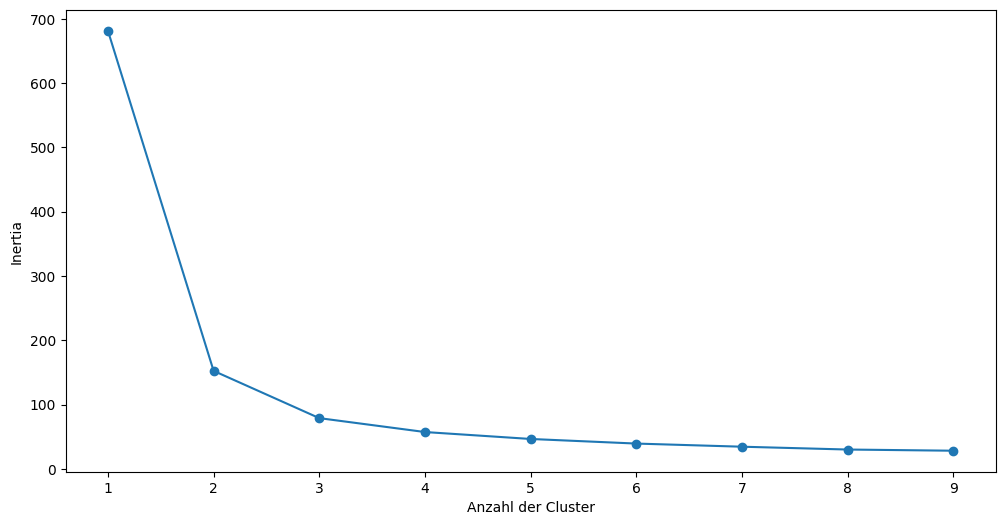

In [16]:
# Erstellung einer Liste zur Aufnahme der Metriken für verschiedene Clustergrößen
metriken = []

# Iteration über verschiedene Clustergrößen und Berechnung der Metrik (inertia) für jeden Cluster
for anzahl_cluster in range(1, 10):
    kmeans = KMeans(n_clusters=anzahl_cluster, n_init=10)
    kmeans.fit(X)
    metriken.append(kmeans.inertia_)

# Erstellen eines Pandas Dataframes aus der Liste der Metriken und Plotten der Ergebnisse
df_metriken = pd.DataFrame({'Anzahl_Cluster': range(1, 10), 'Metrik': metriken})
plt.figure(figsize=(12, 6))
plt.plot(df_metriken['Anzahl_Cluster'], df_metriken['Metrik'], marker='o')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Inertia')

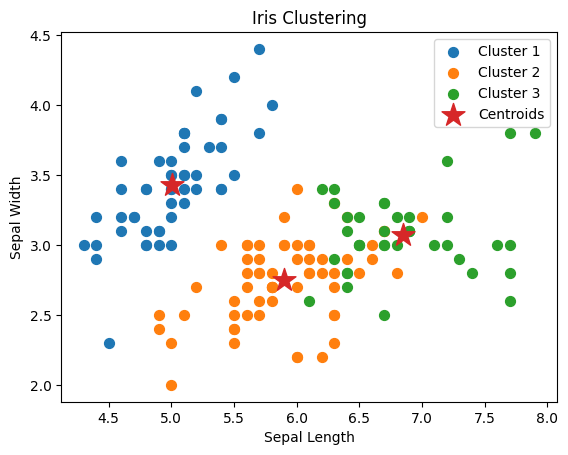

In [17]:

# Definieren der KMeans-Funktion mit der Anzahl der Cluster und explizitem n_init
kmeans = KMeans(n_clusters=3, n_init=10)

# Anwenden des KMeans-Algorithmus auf die Daten
kmeans.fit(X)

# Zuordnen jedes Merkmals (Features) zu einem Cluster
y_kmeans = kmeans.predict(X)

# Erstellen des Plots
for cluster_label in range(kmeans.n_clusters):
    plt.scatter(X[y_kmeans == cluster_label, 0], X[y_kmeans == cluster_label, 1], s=50, label='Cluster {}'.format(cluster_label + 1))

# Markieren der Zentroide (Centroids) der Cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, marker='*', label='Centroids')

plt.title('Iris Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


# 2.2 Principle Component Analysis (PCA)

In [18]:
# Iris Daten
X = load_iris()['data']

# Targets dienen zum plotten
color = load_iris()['target'] 

### 2.2.1 Erklärte Varianz

Text(0.5, 1.0, 'Kumulierte erklärte Varianz in Abhängigkeit von der Anzahl der PCA-Komponenten')

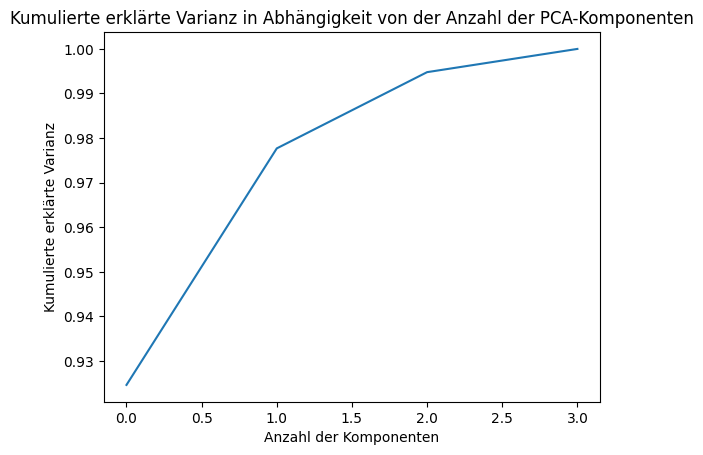

In [19]:
#PCA durchführen und kumulierte erklärte Varianz darstellen
pca = PCA().fit(X)

#Kumulierte erklärte Varianz berechnen
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

#Plot erstellen
plt.plot(cumulative_variance_ratio)
plt.xlabel('Anzahl der Komponenten')
#plt.xticks([0,1,2,3])
plt.ylabel('Kumulierte erklärte Varianz')
plt.title('Kumulierte erklärte Varianz in Abhängigkeit von der Anzahl der PCA-Komponenten')

### 2.2.3 Dimensionsreduzierung

In [20]:
# Load Data
X = load_iris()['data']
color = load_iris()['target']

# PCA 
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)
X_pca = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (150, 4)
transformed shape: (150, 3)


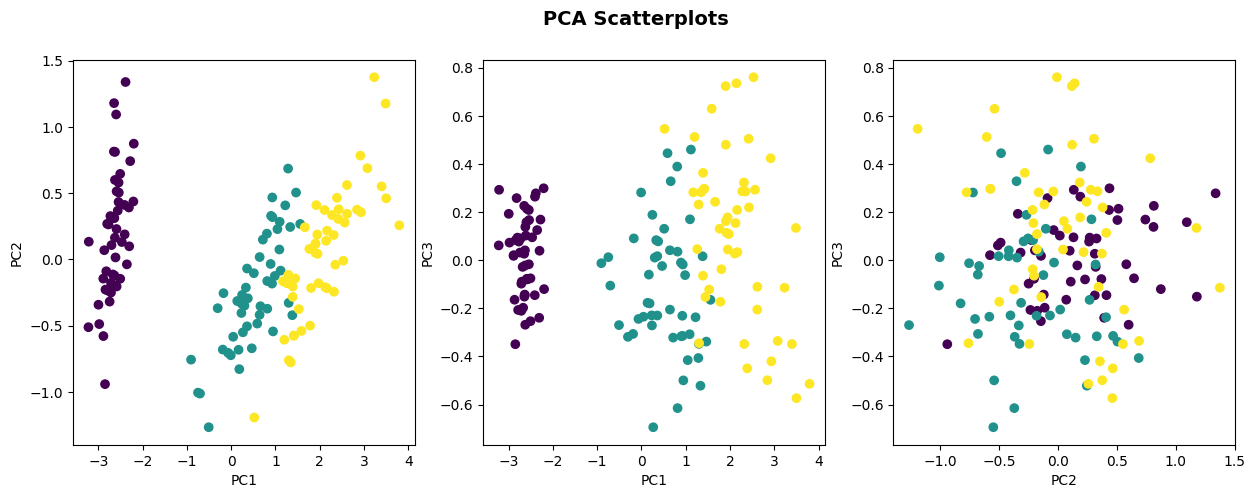

In [21]:
# Erstellen eines 1x3-Subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Scatterplot für den ersten Subplot
ax[0].scatter(X_pca['PC1'], X_pca['PC2'], c=color, cmap='viridis')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

# Scatterplot für den zweiten Subplot
ax[1].scatter(X_pca['PC1'], X_pca['PC3'], c=color, cmap='viridis')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC3')

# Scatterplot für den dritten Subplot
ax[2].scatter(X_pca['PC2'], X_pca['PC3'], c=color, cmap='viridis')
ax[2].set_xlabel('PC2')
ax[2].set_ylabel('PC3')

# Titel des Plots setzen
fig.suptitle('PCA Scatterplots', fontsize=14, fontweight='bold')

# Anzeigen des Plots
plt.show()

## 2.3 Kombination PCA und Clustering

## <font color='red'>Aufgabe: </font>
Die Kombination von PCA und Clustering ermöglicht es, Muster in den Daten zu erkennen, die auf den ersten Blick nicht erkennbar sind. Um dies zu erreichen, können wir zunächst eine PCA durchführen, um die Dimensionalität der Daten zu reduzieren, und dann ein Clustering auf den transformierten Daten anwenden.

Um dies in der Praxis anzuwenden, können wir den Code von oben verwenden, um statt der ursprünglichen Variable X die dimensionsreduzierte Variable X_pca zu clustern. Das Ergebnis des kmeans.predict kann dann als Farbschema des Scatterplots verwendet werden, um die verschiedenen Cluster zu visualisieren.
